In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import fits 
from astropy.cosmology import FlatLambdaCDM
from scipy.constants import c

path = '/Users/connor_auge/Research/Disertation/catalogs/' # Path for photometry catalogs

In [2]:
def flux_to_lum(F,z,wave=np.nan):
    '''Function to convert flux to luminosity'''
    cosmo = FlatLambdaCDM(H0=70, Om0=0.29, Tcmb0=2.725)

    dl = cosmo.luminosity_distance(z).value  # Distance in Mpc
    dl_cgs = dl*(3.0856E24)  # Distance from Mpc to cm

    if np.isnan(wave):
        nuFnu = F
    else:
        # convert clux units from Jy to ger/s/cm^2
        wave_cgs = wave*1E-8 # obs wave from Angstroms to cm
        rest_wave_cgs = wave_cgs/(1+z)
        obs_freq = 3E10/wave_cgs
        rest_freq = 3E10/rest_wave_cgs
        F *= 1E-23
        nuFnu = obs_freq*F
        # convert flux to luminosity
    L = nuFnu*4*np.pi*dl_cgs**2

    return L


def lum_to_flux(L,z):
    '''Function to convert flux to luminosity'''
    cosmo = FlatLambdaCDM(H0=70, Om0=0.29, Tcmb0=2.725)

    dl = cosmo.luminosity_distance(z).value  # Distance in Mpc
    dl_cgs = dl*(3.0856E24)  # Distance from Mpc to cm

    # convert flux to luminosity
    F = L/(4*np.pi*dl_cgs**2)
    
    return F


def lum_to_flux2(L,z,w):
    cosmo = FlatLambdaCDM(H0=70, Om0=0.29, Tcmb0=2.725)

    dl = cosmo.luminosity_distance(z).value  # Distance in Mpc
    dl_m = dl*(3.0856E22)  # Distance from Mpc to m

    surf = 4*np.pi*dl_m**2

    k_corr_SED = 1e-29 * surf * c / (w * 1e-6)

    F = L/k_corr_SED

    return F

def flux_to_lum2(F,z,w):
    cosmo = FlatLambdaCDM(H0=70, Om0=0.29, Tcmb0=2.725)

    dl = cosmo.luminosity_distance(z).value  # Distance in Mpc
    dl_m = dl*(3.0856E22)  # Distance from Mpc to m

    surf = 4*np.pi*dl_m**2

    k_corr_SED = 1e-29 * surf * c / (w * 1e-6)

    L = F*k_corr_SED

    return L

In [3]:
Fx_hard_wave = 2.07*1E-1 # Angstroms
Fx_full_wave = 2.36 # Angstroms

In [4]:
goodsN_auge = fits.open(path+'GOODSN_full_cat_update.fits')
goodsN_auge_data = goodsN_auge[1].data
goodsN_auge.close()

goodsS_auge = fits.open(path+'GOODSS_full_cat_update.fits')
goodsS_auge_data = goodsS_auge[1].data
goodsS_auge.close()



In [5]:
goodsN_auge_ID = goodsN_auge_data['id_xray']
goodsN_auge_phot_ID = goodsN_auge_data['id_rainbow']
goodsN_RA = goodsN_auge_data['xRA']
goodsN_DEC = goodsN_auge_data['xDec']
goodsN_auge_Lx = goodsN_auge_data['Lx']
goodsN_auge_Lx_hard = goodsN_auge_data['Lx']*0.611
goodsN_auge_z = goodsN_auge_data['z_spec']
goodsN_auge_Nh = goodsN_auge_data['Nh']
goodsN_auge_Nh_lo = goodsN_auge_data['Nh_lo']
goodsN_auge_Nh_hi = goodsN_auge_data['Nh_hi']

goodsN_auge_Fx_hard_match_mjy = goodsN_auge_data['Fx_hard']*4.136E8/(10-2)
goodsN_auge_Fx_soft_match_mjy = goodsN_auge_data['Fx_soft']*4.136E8/(2-0.5)


goodsS_auge_ID = goodsS_auge_data['id_xray']
goodsS_auge_phot_ID = goodsS_auge_data['id_rainbow']
goodsS_auge_RA = goodsS_auge_data['xRA']
goodsS_auge_DEC = goodsS_auge_data['xDEC']
goodsS_auge_Lx_obs = goodsS_auge_data['Lx']
goodsS_auge_Lx_hard_obs = goodsS_auge_data['Lx']*0.611
goodsS_auge_Lx = goodsS_auge_data['Lxc']
goodsS_auge_Lx_hard = goodsS_auge_data['Lxc']*0.611
goodsS_auge_z = goodsS_auge_data['z_spec']
goodsS_auge_Nh = goodsS_auge_data['Nh']
goodsS_auge_Nh_lo = goodsS_auge_data['Nh_lo']
goodsS_auge_Nh_hi = goodsS_auge_data['Nh_hi']

correction = goodsS_auge_Lx_obs/goodsS_auge_Lx

goodsS_Fx_full_int = goodsS_auge_data['Fx_full']/correction
goodsS_Fx_hard_int = goodsS_Fx_full_int*0.611

goodsS_auge_Fx_full_match_mjy = goodsS_auge_data['Fx_full']*4.136E8/(10-0.5)
goodsS_auge_Fx_hard_match_mjy = goodsS_auge_data['Fx_hard']*4.136E8/(10-2)
goodsS_auge_Fx_soft_match_mjy = goodsS_auge_data['Fx_soft']*4.136E8/(2-0.5)
goodsS_auge_Fx_hard_int_match_mjy = goodsS_Fx_hard_int*4.136E8/(10-2)

/var/folders/_6/vw02nk9n7g11l58s8rrjb9k80000gn/T/ipykernel_84161/1841232267.py:29: RuntimeWarning: invalid value encountered in divide
  correction = goodsS_auge_Lx_obs/goodsS_auge_Lx


In [6]:
goodsS_calc_Lx_obs = flux_to_lum(goodsS_auge_Fx_hard_match_mjy/1000,goodsS_auge_z,Fx_hard_wave*10)
goodsS_calc_Lx_obs1 = flux_to_lum(goodsS_auge_data['Fx_hard'],goodsS_auge_z)

goodsS_calc_Lx_obs2 = flux_to_lum2(goodsS_auge_Fx_hard_match_mjy,goodsS_auge_z,Fx_hard_wave*1E-3)*1E7
# # goodsS_calc_Lx_obs = flux_to_lum(goodsS_auge_Fx_hard_match_mjy/1000,goodsS_auge_z)

# goodsS_calc_Lx_obs1 = flux_to_lum2(goodsS_auge_data['Fx_hard'],goodsS_auge_z,w=Fx_full_wave*10)

goodsS_calc_Lx_obs = flux_to_lum2(goodsS_auge_Fx_full_match_mjy,goodsS_auge_z,Fx_full_wave*1E-4)*1E7



In [7]:
print(goodsS_auge_Lx_hard_obs)
print(goodsS_calc_Lx_obs1)
print(goodsS_calc_Lx_obs2)

[2.595528e+44 2.811822e+43 2.090842e+44 ... 0.000000e+00 2.451332e+41
 1.586156e+43]
[ 2.30104029e+44 -0.00000000e+00  2.16417790e+44 ...  0.00000000e+00
  8.78127049e+40  3.70941533e+43]
[ 1.72292004e+44 -0.00000000e+00  1.62044337e+44 ...  0.00000000e+00
  6.57503783e+40  2.77745073e+43]


/var/folders/_6/vw02nk9n7g11l58s8rrjb9k80000gn/T/ipykernel_84161/2866782077.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(goodsS_calc_Lx_obs1),np.log10(goodsS_auge_Lx_hard_obs),'o')
/var/folders/_6/vw02nk9n7g11l58s8rrjb9k80000gn/T/ipykernel_84161/2866782077.py:2: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(goodsS_calc_Lx_obs1),np.log10(goodsS_auge_Lx_hard_obs),'o')
/var/folders/_6/vw02nk9n7g11l58s8rrjb9k80000gn/T/ipykernel_84161/2866782077.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(goodsS_calc_Lx_obs2),np.log10(goodsS_auge_Lx_hard_obs),'.','r')
/var/folders/_6/vw02nk9n7g11l58s8rrjb9k80000gn/T/ipykernel_84161/2866782077.py:3: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(goodsS_calc_Lx_obs2),np.log10(goodsS_auge_Lx_hard_obs),'.','r')
/var/folders/_6/vw02nk9n7g11l58s8rrjb9k80000gn/T/ipykernel_84161/2866782077.py:4: RuntimeWarning: divide by zero encountered in log10
  pl

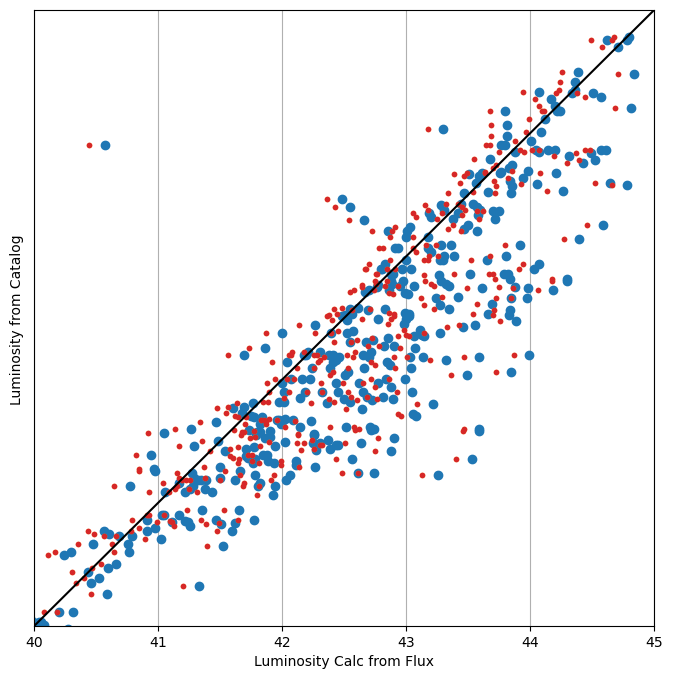

In [8]:
plt.figure(figsize=(8,8),facecolor='w')
plt.plot(np.log10(goodsS_calc_Lx_obs1),np.log10(goodsS_auge_Lx_hard_obs),'o')
plt.plot(np.log10(goodsS_calc_Lx_obs2),np.log10(goodsS_auge_Lx_hard_obs),'.','r')
plt.plot(np.log10(goodsS_calc_Lx_obs2),np.log10(goodsS_auge_Lx_hard_obs),'.')
# plt.plot(np.log10(goodsS_calc_Lx_obs),np.log10(goodsS_auge_Lx_obs),'o')
plt.plot(np.arange(40,47),np.arange(40,47),color='k')
plt.xlabel('Luminosity Calc from Flux')
plt.ylabel('Luminosity from Catalog ')
plt.xlim(40,45)
plt.ylim(40,45)
plt.grid()
plt.show()